In [1]:
import pandas as pd
from matplotlib import pylab
from main.MultiLayerPerceptron import MLP
from main.utils import *
from helpers.YatchDesign import *

In [2]:
df_total = pd.read_csv('data/yacht_hydrodynamics.csv',sep=';')
df_total

,center_of_buoyancy,prismatic_coefficient,length_displacement,beam_draught_ratio,length_beam_ratio,froude_number,resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [3]:
#leave 40% of the data for testing
df = df_total.sample(frac = 0.60)

#normalize
df_means = df.mean()
df_stds = df.std()

df=(df-df_means)/(df_stds) 

#set training and validation data
input, output = encode(df,'resistance')
input_training, output_training, input_validation, output_validation = generate_samples(input, output,4)

In [4]:
model = MLP([6,4,1])
model.save('init')

model.setData(input_validation,output_validation)
print('cost of validation data: ',model.getCost())

cost of validation data:  0.7309618085006547


In [5]:
model.setData(input_training,output_training)
model.train(10000,1000)

model.setData(input_validation,output_validation)
print('cost of validation data: ',model.getCost())

0 1.0404964670547638 1.0368937403478167 1.003474538003999 0.1
1000 0.014765221467499997 0.014998486853048693 0.9844474054060139 0.1
2000 0.0035834957683979173 0.002672027766272853 1.3411147195511555 0.08000000000000002
3000 0.004548875323527972 0.0026256928307362023 1.7324476306897405 0.08000000000000002
4000 0.010365812415298745 0.009835555455675677 1.0539122535593126 0.08000000000000002
5000 0.0032582636486421486 0.0016923130688883963 1.9253314936475403 0.08000000000000002
6000 0.0029708761753605697 0.002137112261185203 1.3901357590419592 0.08000000000000002
7000 0.011641117814721625 0.0101979647485608 1.1415138316068891 0.08000000000000002
8000 0.004284936955770051 0.0022590277034632493 1.8968058466927784 0.08000000000000002
9000 0.0019742773249520787 0.0014798939773963166 1.334066733905875 0.08000000000000002
initial and final training cost:  1.0682972364336705 0.005142379303544863
cost of validation data:  0.00496825890636761


In [6]:
##test

df_test = pd.DataFrame(df_total.drop(df.index))
output_real=df_test['resistance'].tolist()

# normalization (uses mean and std from training and validation, which is the one the model is trained with)
# aka it's normalized using the same parameters the model used to train:
df_test=(df_test-df_means)/(df_stds)
input_test, output_test = encode(df_test,'resistance')
model.setData(input_test,output_test)
print('test cost:',model.getCost())

test cost: 0.007618484745000711


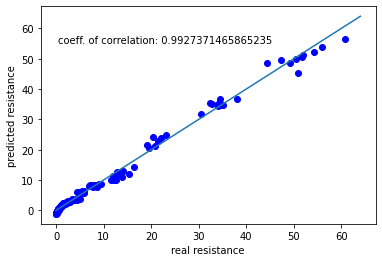

In [7]:
#denormalize  --> inverse df=(df-df_means)/(df_stds) for resistance
mean_resistance = df_means['resistance']
std_resistance = df_stds['resistance']

output_predicted=[a[0]*std_resistance+mean_resistance for a in model.layers[-1].a]

model.save('final')

r2=rSquared(output_real,output_predicted)
pylab.plot(output_real,output_predicted, 'bo')
a =[a for a in range(65)]
pylab.plot(a,a)
pylab.text(0.5, 55, 'coeff. of correlation: ' + str(r2))
pylab.xlabel('real resistance')
pylab.ylabel('predicted resistance')

pylab.show()


In [8]:
model.save('final')

True